<a href="https://colab.research.google.com/github/555sumit/Silly-ML--projects./blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_excel('British Airways Summer Schedule Dataset - Forage Data Science Task 1.xlsx',
                   sheet_name='british_airways_schedule_summer')

# Compute total seats as proxy for total passengers
df['TOTAL_SEATS'] = df['FIRST_CLASS_SEATS'] + df['BUSINESS_CLASS_SEATS'] + df['ECONOMY_SEATS']

# Compute proportions
df['TIER1_PROP'] = df['TIER1_ELIGIBLE_PAX'] / df['TOTAL_SEATS']
df['TIER2_PROP'] = df['TIER2_ELIGIBLE_PAX'] / df['TOTAL_SEATS']
df['TIER3_PROP'] = df['TIER3_ELIGIBLE_PAX'] / df['TOTAL_SEATS']
df.fillna(0, inplace=True)

# Features and targets
features = ['HAUL', 'AIRCRAFT_TYPE', 'TIME_OF_DAY', 'ARRIVAL_REGION',
            'FIRST_CLASS_SEATS', 'BUSINESS_CLASS_SEATS', 'ECONOMY_SEATS']
X = df[features]
y = df[['TIER1_PROP', 'TIER2_PROP', 'TIER3_PROP']]

# Preprocessor for categorical features
categorical_features = ['HAUL', 'AIRCRAFT_TYPE', 'TIME_OF_DAY', 'ARRIVAL_REGION']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Store trained models and metrics
pipelines = {}
metrics = {}

for tier, target in zip(['TIER1', 'TIER2', 'TIER3'], ['TIER1_PROP', 'TIER2_PROP', 'TIER3_PROP']):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y[target], test_size=0.2, random_state=42)

    # Build pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    # Train
    pipeline.fit(X_train, y_train)

    # Evaluate
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store
    pipelines[tier] = pipeline
    metrics[tier] = {'RMSE': rmse, 'R2': r2}

# Print metrics
for tier in metrics:
    print(f"{tier}: RMSE = {metrics[tier]['RMSE']:.4f}, R² = {metrics[tier]['R2']:.3f}")


/tmp/ipython-input-8-2396095696.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


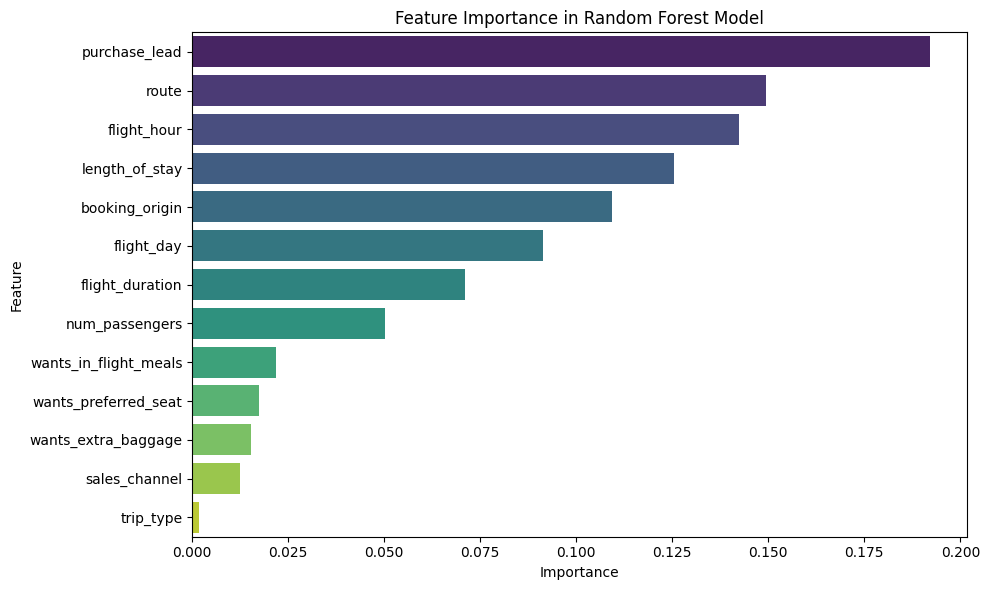

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# After fitting the model...
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for easier plotting
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
